## Correlation between HCR and snRNAseq

This notebook includes code for assessing the correlation between HCR and snRNAseq datasets

#### Import libraries

In [1]:
library(cowplot)
library(reshape2)
library(gridExtra)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(plotly)
library(ggrepel)
library(ggpubr)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine() masks gridExtra::combine()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




#### Calculating proportion of cells in the HCR dataset that express each gene

In [2]:
WT.bind <- readRDS("HCR_files/spot_counts.rds")

In [3]:
grab.spots<-colnames(WT.bind[grep('.Copies',colnames(WT.bind))])
WT.spots <- WT.bind[grab.spots]
rownames(WT.spots) <- WT.bind$barcode

In [4]:
WT.spots[WT.spots < 5] <- 0
WT.spots[WT.spots > 0] <- 1

In [5]:
WT1S2 <- WT.spots[grep("WT-1-S2",rownames(WT.spots)),]
WT1S3 <- WT.spots[grep("WT-1-S3",rownames(WT.spots)),]
WT1S4 <- WT.spots[grep("WT-1-S4",rownames(WT.spots)),]
WT1S5 <- WT.spots[grep("WT-1-S5",rownames(WT.spots)),]

In [6]:
WT2S2 <- WT.spots[grep("WT-2-S2",rownames(WT.spots)),]
WT2S3 <- WT.spots[grep("WT-2-S3",rownames(WT.spots)),]
WT2S4 <- WT.spots[grep("WT-2-S4",rownames(WT.spots)),]
WT2S5 <- WT.spots[grep("WT-2-S6",rownames(WT.spots)),]

In [7]:
WT3S2 <- WT.spots[grep("WT-3-S2",rownames(WT.spots)),]
WT3S3 <- WT.spots[grep("WT-3-S4",rownames(WT.spots)),]
WT3S4 <- WT.spots[grep("WT-3-S5",rownames(WT.spots)),]
WT3S5 <- WT.spots[grep("WT-3-S6",rownames(WT.spots)),]

In [8]:
WT4S2 <- WT.spots[grep("WT-4-S3",rownames(WT.spots)),]
WT4S3 <- WT.spots[grep("WT-4-S4",rownames(WT.spots)),]
WT4S4 <- WT.spots[grep("WT-4-S5",rownames(WT.spots)),]

In [9]:
WT5S3 <- WT.spots[grep("WT-5-S3",rownames(WT.spots)),]
WT5S4 <- WT.spots[grep("WT-5-S4",rownames(WT.spots)),]
WT5S5 <- WT.spots[grep("WT-5-S6",rownames(WT.spots)),]

In [10]:
WT6S2 <- WT.spots[grep("WT-6-S2",rownames(WT.spots)),]
WT6S3 <- WT.spots[grep("WT-6-S3",rownames(WT.spots)),]
WT6S4 <- WT.spots[grep("WT-6-S4",rownames(WT.spots)),]
WT6S5 <- WT.spots[grep("WT-6-S5",rownames(WT.spots)),]

In [11]:
WT7S3 <- WT.spots[grep("WT-7-S3",rownames(WT.spots)),]
WT7S4 <- WT.spots[grep("WT-7-S4",rownames(WT.spots)),]
WT7S5 <- WT.spots[grep("WT-7-S6",rownames(WT.spots)),]

In [12]:
WT8S2 <- WT.spots[grep("WT-8-S2",rownames(WT.spots)),]
WT8S3 <- WT.spots[grep("WT-8-S3",rownames(WT.spots)),]
WT8S4 <- WT.spots[grep("WT-8-S4",rownames(WT.spots)),]
WT8S5 <- WT.spots[grep("WT-8-S6",rownames(WT.spots)),]

In [13]:
WT1S2.s <- colSums(WT1S2)
WT1S3.s <- colSums(WT1S3)
WT1S4.s <- colSums(WT1S4)
WT1S5.s <- colSums(WT1S5)

WT2S2.s <- colSums(WT2S2)
WT2S3.s <- colSums(WT2S3)
WT2S4.s <- colSums(WT2S4)
WT2S5.s <- colSums(WT2S5)

WT3S2.s <- colSums(WT3S2)
WT3S3.s <- colSums(WT3S3)
WT3S4.s <- colSums(WT3S4)
WT3S5.s <- colSums(WT3S5)

WT4S2.s <- colSums(WT4S2)
WT4S3.s <- colSums(WT4S3)
WT4S4.s <- colSums(WT4S4)

WT5S2.s <- colSums(WT5S3)
WT5S3.s <- colSums(WT5S4)
WT5S5.s <- colSums(WT5S5)

WT6S2.s <- colSums(WT6S2)
WT6S3.s <- colSums(WT6S3)
WT6S4.s <- colSums(WT6S4)
WT6S5.s <- colSums(WT6S5)

WT7S3.s <- colSums(WT7S3)
WT7S4.s <- colSums(WT7S4)
WT7S5.s <- colSums(WT7S5)

WT8S2.s <- colSums(WT8S2)
WT8S3.s <- colSums(WT8S3)
WT8S4.s <- colSums(WT8S4)
WT8S5.s <- colSums(WT8S5)

In [14]:
S1 <- data.frame(WT1S2.s, WT2S2.s, WT3S2.s, WT4S2.s, WT5S2.s, WT6S2.s, WT8S2.s)
S2 <- data.frame(WT1S3.s, WT2S3.s, WT3S3.s, WT4S3.s, WT5S3.s, WT6S3.s, WT7S3.s, WT8S3.s)
S3 <- data.frame(WT1S4.s, WT2S4.s, WT3S4.s, WT4S4.s, WT6S4.s, WT8S4.s)
S4 <- data.frame(WT1S5.s, WT2S5.s, WT3S5.s, WT5S5.s, WT6S5.s, WT8S5.s)

In [15]:
S1<-data.frame(rowSums(S1))
S2<-data.frame(rowSums(S2))
S3<-data.frame(rowSums(S3))
S4<-data.frame(rowSums(S4))

In [16]:
total <- cbind(S1, S2, S3, S4)
total <- data.frame(rowSums(total))
total.num <- length(rownames(WT.spots[rowSums(WT.spots) > 0,]))

prop<-total/total.num*100
rownames(prop) <- gsub('.Copies','',rownames(total))
prop$gene <- rownames(prop)

In [17]:
#prop <- prop[prop$gene != 'vgat',]

In [18]:
prop$gene<-factor(prop$gene, levels=c('onecut2','col15a1','sst','crhr2','drd2','drd3','met','nts','tacr1','samd3','foxp2','vglut2','pax6','esr1','vgat'))

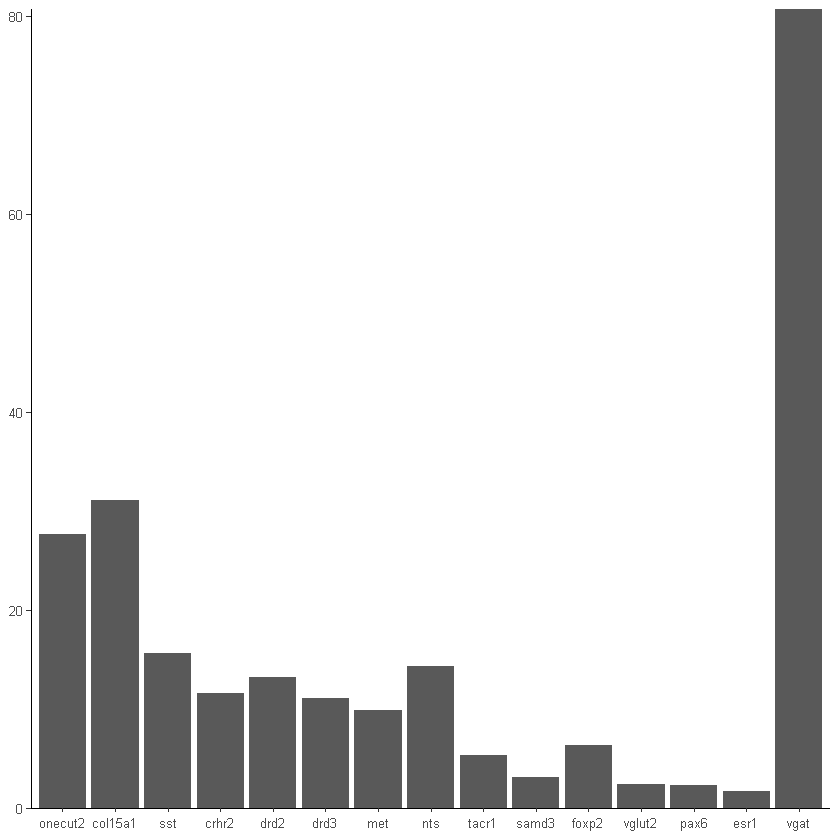

In [19]:
ggplot(prop, aes(x=gene, y=rowSums.total.))+
    geom_bar(stat='identity') +
      theme_classic() +
      theme(
        axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=8),
        axis.text.x = element_text( size=8),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        legend.position='none',
        legend.key.size = unit(0.25, 'cm')) +
        scale_y_continuous(expand = c(0, 0))

#### Calculating the proportion of cells that express each gene in the snRNAseq data

In [20]:
library(Seurat)
library(dplyr)
library(magrittr)
library(ggplot2)
library(xlsx)
library(tidyr)

Attaching SeuratObject


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




In [21]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

In [22]:
LS.integrated <- NormalizeData(LS.integrated)
DefaultAssay(LS.integrated) <- "RNA"

In [23]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [24]:
total<-sum(data.frame(table(Idents(LS.integrated)))$Freq)

In [25]:
Nts <- sum(data.frame(table(Idents(subset(LS.integrated, Nts > 0))))$Freq)/total*100
Sst <- sum(data.frame(table(Idents(subset(LS.integrated, Sst > 0))))$Freq)/total*100
Crhr2 <- sum(data.frame(table(Idents(subset(LS.integrated, Crhr2 > 0))))$Freq)/total*100
Drd2 <- sum(data.frame(table(Idents(subset(LS.integrated, Drd2 > 0))))$Freq)/total*100
Drd3 <- sum(data.frame(table(Idents(subset(LS.integrated, Drd3 > 0))))$Freq)/total*100
Met <- sum(data.frame(table(Idents(subset(LS.integrated, Met > 0))))$Freq)/total*100
Esr1 <- sum(data.frame(table(Idents(subset(LS.integrated, Esr1 > 0))))$Freq)/total*100
Slc17a6 <- sum(data.frame(table(Idents(subset(LS.integrated, Slc17a6 > 0))))$Freq)/total*100
Slc32a1 <- sum(data.frame(table(Idents(subset(LS.integrated, Slc32a1 > 0))))$Freq)/total*100
Tacr1 <- sum(data.frame(table(Idents(subset(LS.integrated, Tacr1 > 0))))$Freq)/total*100
Pax6 <- sum(data.frame(table(Idents(subset(LS.integrated, Pax6 > 0))))$Freq)/total*100
Foxp2 <- sum(data.frame(table(Idents(subset(LS.integrated, Foxp2 > 0))))$Freq)/total*100
Samd3 <- sum(data.frame(table(Idents(subset(LS.integrated, Samd3 > 0))))$Freq)/total*100
Onecut2 <- sum(data.frame(table(Idents(subset(LS.integrated, Onecut2 > 0))))$Freq)/total*100
Col15a1 <- sum(data.frame(table(Idents(subset(LS.integrated, Col15a1 > 0))))$Freq)/total*100

In [26]:
tally <-data.frame("nts"=Nts, 
          "sst"=Sst,
          "crhr2"=Crhr2,
          "drd2"=Drd2,
          "drd3"=Drd3,
          "met"=Met,
          "esr1"=Esr1,
          "vglut2"=Slc17a6,
          "vgat"=Slc32a1,
           "tacr1"=Tacr1,
           "pax6"=Pax6,
           "foxp2"=Foxp2,
           "samd3"=Samd3,
           "onecut2"=Onecut2,
           "col15a1"=Col15a1)

In [27]:
tally<-data.frame(t(tally))
tally$gene <- rownames(tally)
colnames(tally)<-c('prop','gene')

In [28]:
tally

,prop,gene
,<dbl>,<chr>
nts,13.019877,nts
sst,18.397313,sst
crhr2,6.943414,crhr2
drd2,13.914164,drd2
drd3,4.764322,drd3
met,9.302144,met
esr1,8.083727,esr1
vglut2,8.044675,vglut2
vgat,44.151990,vgat


In [ ]:
saveRDS(tally, file='C:/Users/stuberadmin/Documents/HCR_analysis/graphs/seq_tally.rds')

In [29]:
seq_tally <- readRDS(file='C:/Users/stuberadmin/Documents/HCR_analysis/graphs/seq_tally.rds')
seq_tally

,prop,gene
,<dbl>,<chr>
nts,12.805092,nts
sst,17.831062,sst
crhr2,6.873121,crhr2
drd2,13.574413,drd2
drd3,4.721365,drd3
met,9.149842,met
esr1,7.954856,esr1
vglut2,8.001718,vglut2
vgat,41.824501,vgat


Combining data

In [30]:
prop<- prop[match(seq_tally$gene,prop$gene),]

In [31]:
df<-cbind(seq_tally, prop$rowSums.total.)

In [32]:
colnames(df) <- c("seq","gene","hcr")

In [33]:
cor(df$seq, df$hcr)

[1] 0.8436669

In [34]:
#df <- df[-c(9), ] #remove vgat

`geom_smooth()` using formula 'y ~ x'



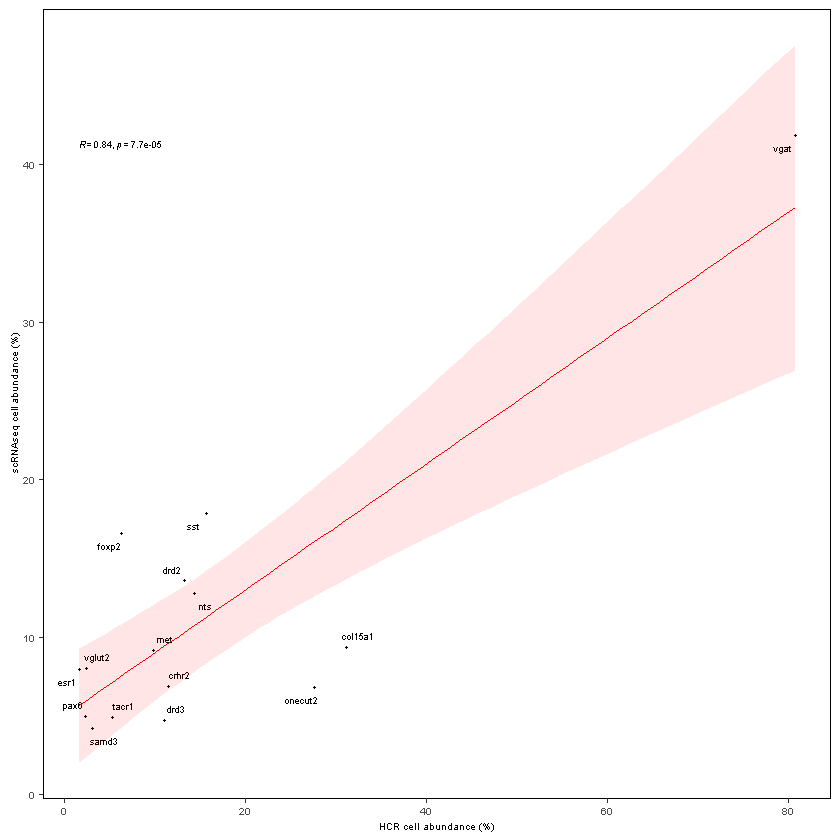

In [35]:
ggplot(df, aes(x=hcr, y=seq, label=gene)) +
    geom_point(size=0.5) +
    theme_classic() +
    geom_text_repel(size=2) +
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
    geom_smooth(method='lm', color="red", fill="red", alpha=0.1, size=0.5)+
    xlab("HCR cell abundance (%)") + 
    ylab("scRNAseq cell abundance (%)")+
    stat_cor(size=2, label.sep=", ")

#### Assessing correlations on a cluster-by-cluster basis

In [36]:
hcr.avg <- readRDS(file="HCR_snRNAseq_files/LS_HCR_marker_expression_df.rds")

In [37]:
seq.avg <- DotPlot(LS.integrated, features=c('Col15a1','Met','Nts','Sst','Crhr2','Drd3','Esr1','Foxp2','Tacr1','Pax6','Drd2','Samd3','Onecut2','Slc32a1','Slc17a6'))$data

In [38]:
genes <- c('Col15a1','Met','Nts','Sst','Crhr2','Drd3','Esr1','Foxp2','Tacr1','Pax6','Drd2','Samd3','Onecut2','Slc32a1','Slc17a6')
seq.types <- c('Gaba11','Gaba9','Gaba1','Gaba8','Gaba2',"Gaba7","Gaba10","Glu1","Gaba6","Gaba5",'Gaba4',"Glu2")
hcr.types <- c('Sst','Met','Col15a1','Nts','Drd3',"Foxp2","Tacr1","Samd3","Pax6","Crhr2",'Esr1',"Onecut2")

In [39]:
cor.1 <- vector()
cor.2 <- data.frame('gene'=seq.types)
for (i in seq.types){
    for (k in hcr.types){
        a<-cor(hcr.avg[hcr.avg$id==k,]$pct.exp, seq.avg[seq.avg$id==i,]$pct.exp)
        cor.1[k] <- a
    }
    cor.2<-cbind(cor.2,cor.1)
}

p.1 <- vector()
p.2 <- data.frame('gene'=seq.types)
for (i in seq.types){
    for (k in hcr.types){
        a<-cor.test(hcr.avg[hcr.avg$id==k,]$pct.exp, seq.avg[seq.avg$id==i,]$pct.exp, method="pearson")$p.value
        p.1[k] <- a
    }
    p.2<-cbind(p.2,p.1)
}

In [40]:
cor.df <- cor.2[2:13]
colnames(cor.df)<-hcr.types
rownames(cor.df)<-seq.types

cor.df<-data.matrix(cor.df)
cor.df.long <-melt(cor.df)

cor.df.long$Var1<-factor(cor.df.long$Var1, levels=rev(c('Gaba5','Gaba11','Gaba6','Gaba4','Gaba7','Gaba9','Gaba1','Gaba2','Gaba8','Gaba10','Glu2','Glu1')))
cor.df.long$Var2<-factor(cor.df.long$Var2, levels=(c('Crhr2','Sst','Pax6','Esr1','Foxp2','Met','Col15a1','Drd3','Nts','Tacr1','Onecut2','Samd3')))

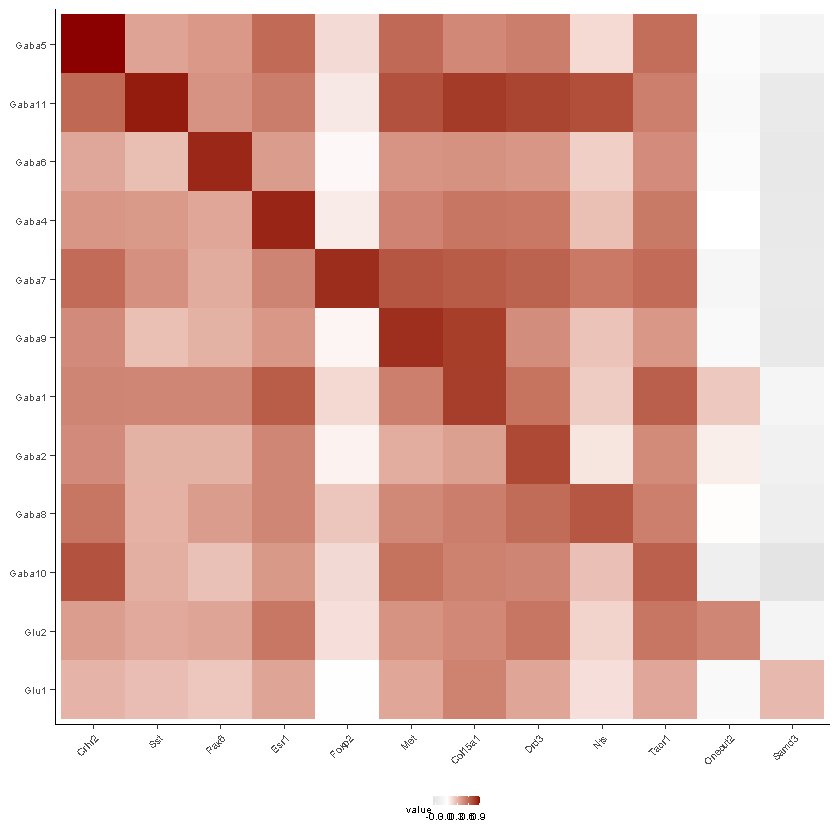

In [41]:
ggplot(cor.df.long, aes(x=Var1, y=Var2, fill=value))+
geom_tile() + scale_fill_gradient2(low='gray',mid='white',high='darkred',midpoint=0) +
theme_classic()+
    theme( axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6,),
        axis.text.x = element_text(size=6, angle=45, hjust=1),
        axis.title = element_blank(),
        legend.position='bottom',
        legend.key.size = unit(.2, 'cm'),
        legend.title = element_text(size=6),
        legend.text = element_text(size=6)) + coord_flip()